Problem formulation: 🧐
We are going to predict the outcome of a specific speed dating session based on the profile of two people, so we can implement a recommendation system to better match people in speed dating events.This is a binary classification task. Given a data sample (information about the dating session), we are going to predict the probability (0-1, float) that the dating session will lead to a successful match. Data mining function required is probabilistic classification.

The impact
It will help in recommending for each individual is dream partner that will lead for successful relationship for long lasting time



**import the important libraries**  🥝

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

load our data  🙃

In [ ]:
train_data= pd.read_csv("train.csv")  #Reading our train set 
test_data= pd.read_csv("test.csv")   #Reading our test set


In [ ]:
train_data.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


wow 😮 from the previous cell the data contain many null values how should i deal with it let's see 💪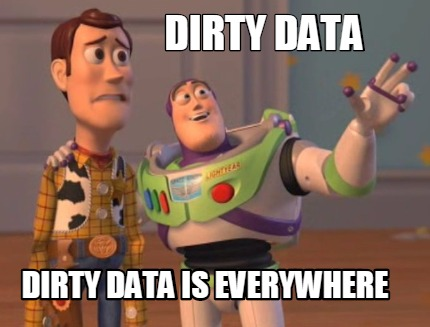

In [ ]:
train_data.describe()  #Getting a deeper description of our data


,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,...,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,5909.000000
mean,0.505331,17.360298,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,...,8.105563,8.377318,7.644437,7.398716,6.799717,7.631989,7.944798,7.162774,7.092711,4191.314943
std,0.500014,10.947542,0.380133,6.011495,4.389246,5.482368,5.611803,5.45710,5.500706,158.993002,...,1.601011,1.459013,1.757559,1.956924,1.535768,1.498024,1.320919,1.687431,1.713729,2408.009173
min,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000
25%,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.00000,4.000000,153.000000,...,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,2124.000000
50%,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.00000,8.000000,280.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,4210.000000
75%,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.00000,13.000000,409.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6266.000000
max,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.00000,22.000000,552.000000,...,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8372.000000


In [ ]:
test_data.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,5,2,2,16,3,NaN,13,13,52.0,...,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,934
1,0,33,2,14,18,6,6.0,4,8,368.0,...,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0,6539
2,1,6,2,9,20,10,16.0,15,19,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6757
3,1,26,2,2,19,15,NaN,8,10,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2275
4,0,29,2,7,16,7,7.0,10,5,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052


In [ ]:
#Declare a new param call id equal to id of test data for late use in the csv competition file
id=test_data.id

**handling missing values**  ☑ ⚡

from observation some of the name of our columns of our dataset is not clear and need to rename it so before handling missing values i can know what i am hanf=dling without confusing 😶

In [ ]:
#https://pandas.pydata.org/pandas-docs/dev/user_guide/options.html(this is an important link to know pandas tools and options)
pd.options.display.max_columns = None
#rename columns in training dataset

train_data.rename(columns={"gender": "Gender", 
                     "condtn":"Condition",
                  
                     "age_o":"age of partner",
                     "race_o":"race of partner",
                     "pf_o_att":"partner stated preference",
                  
                     "attr_o":"partner rating of attributes",
                     "imprace":"race importance",
                     "imprelig":"religion importance",
                     "from":"originally from",
                     "date":"frequency of date"}, inplace=True)
#rename columns in testing dataset

test_data.rename(columns={"gender": "Gender", 
                     "condtn":"Condition",
                  
                     "age_o":"age of partner",
                     "race_o":"race of partner",
                     "pf_o_att":"partner stated preference",
                  
                     "attr_o":"partner rating of attributes",
                     "imprace":"race importance",
                     "imprelig":"religion importance",
                     "from":"originally from",
                     "date":"frequency of date"}, inplace=True)

In [ ]:
train_data.Condition

0       2
1       1
2       1
3       2
4       2
       ..
5904    2
5905    2
5906    2
5907    2
5908    2
Name: Condition, Length: 5909, dtype: int64

**the above cell shows that the rename func works**  💃

In [ ]:
#Is there anything missing values?
train_data.isnull().sum().sort_values(ascending=False)

num_in_3     5449
numdat_3     4849
expnum       4627
amb7_2       4519
sinc7_2      4519
             ... 
position        0
round           0
wave            0
Condition       0
id              0
Length: 192, dtype: int64

**null**  **null** **null**
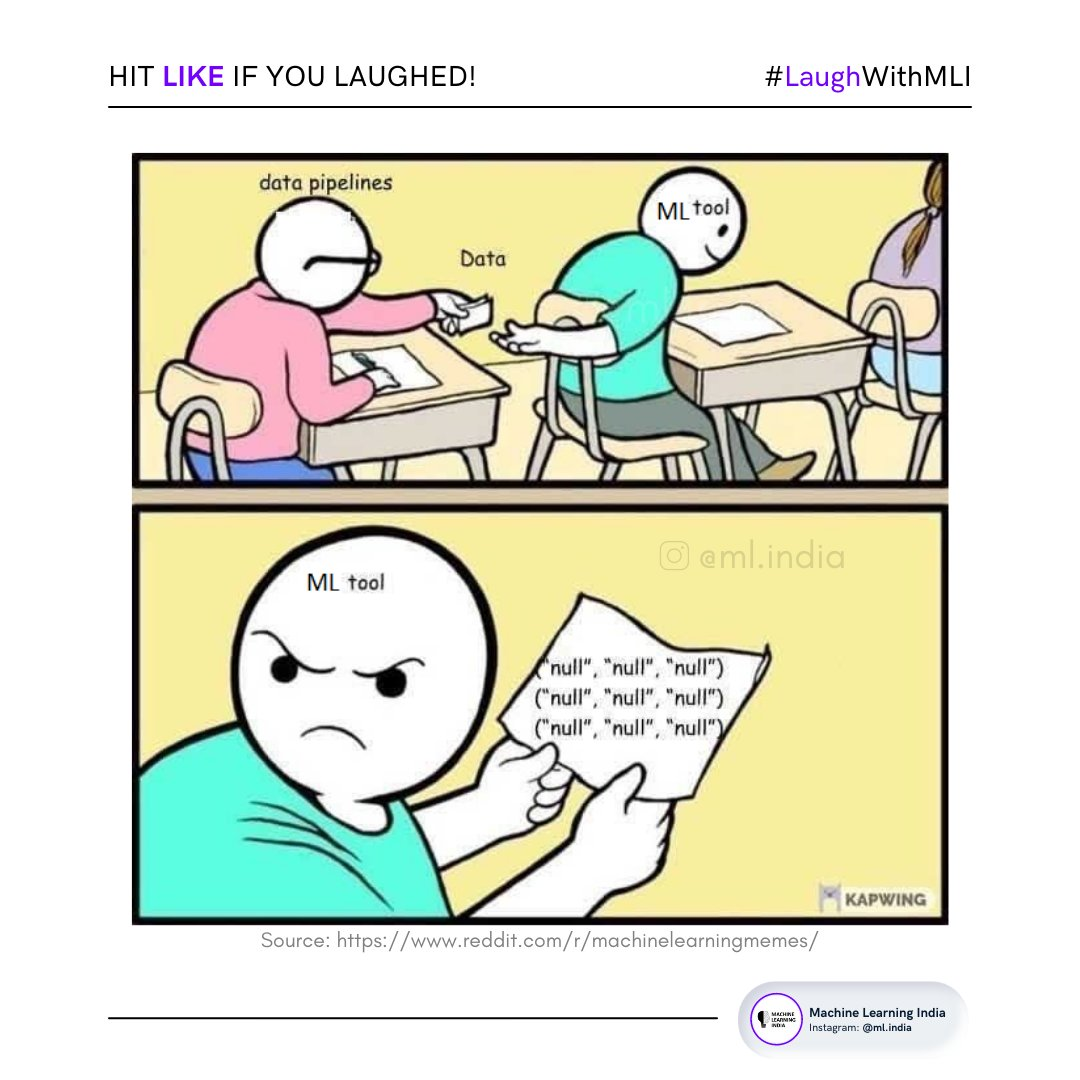

In [ ]:
# checking datatypes of our columns:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, Gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


In [ ]:

#showing the percentage of null values in each column
def missing_values(train_data):
    missing=pd.DataFrame(train_data.isnull().sum()/len(train_data))*100
    missing.columns = ['missing_values(%)']
    missing['missing_values(numbers)'] = pd.DataFrame(train_data.isnull().sum())
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(train_data)
     

,missing_values(%),missing_values(numbers)
num_in_3,92.215265,5449
numdat_3,82.061262,4849
expnum,78.304282,4627
amb7_2,76.476561,4519
sinc7_2,76.476561,4519
...,...,...
position,0.000000,0
round,0.000000,0
wave,0.000000,0
Condition,0.000000,0



 **there are many  features"columns" that have null values huge number of columns in the dataset have null values what should i do should i remove them let's see**😶


In [ ]:
#first step
#Dropping id column as it doesn't give us any useful information 
train_data.drop('id',axis='columns', inplace=True)
test_data.drop('id',axis='columns', inplace=True)

In [ ]:
train_data['num_in_3'].shape,




((5909,),)

In [ ]:
train_data['numdat_3'].shape,


((5909,),)

**wow the above columns in the cells and some others columns have more than 70% null values and their values are lesss than null values so as a data scientist i think i should drop it i will pray to th god that i am doing well**  🔼

**to be honest i will drop the columns that their values almost is null values and the columns that have less null values i will remain it may be i can deal with i**t  😥

In [ ]:
#Removing columns that have NaN values more than 50% of its values
#Droppping field and career as we have career_c which is a code for each carrer value and field_cd which is a code values for each field (field and carrer are redundant info)
train_data.drop(columns=['field', 'career','num_in_3','numdat_3','expnum','sinc7_2','amb7_2','shar7_2','attr7_2','intel7_2','fun7_2','attr5_3','shar7_3','shar2_3','sinc5_3','intel5_3',
'attr7_3','sinc7_3','fun5_3','intel7_3','fun7_3','amb5_3','amb7_3','sinc4_3','sinc4_3','attr4_3','intel4_3','fun4_3','shar4_3','attr2_3','sinc2_3','intel2_3','fun2_3','amb2_3','amb4_3','mn_sat','tuition','intel3_3','them_cal','sinc3_3','you_call','attr3_3','date_3','amb3_3','fun3_3','shar1_3','attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3','amb3_s','attr3_s','sinc3_s','fun3_s','intel3_s','shar1_s','amb1_s','fun1_s','intel1_s','sinc1_s','attr1_s'],axis='columns', inplace=True)

test_data.drop(columns=['field', 'career','num_in_3','numdat_3','expnum','sinc7_2','amb7_2','shar7_2','attr7_2','intel7_2','fun7_2','attr5_3','shar7_3','shar2_3','sinc5_3','intel5_3',
'attr7_3','sinc7_3','fun5_3','intel7_3','fun7_3','amb5_3','amb7_3','sinc4_3','sinc4_3','attr4_3','intel4_3','fun4_3','shar4_3','attr2_3','sinc2_3',
'intel2_3','fun2_3','amb2_3','amb4_3','mn_sat','tuition','intel3_3','them_cal','sinc3_3','you_call','attr3_3','date_3','amb3_3','fun3_3','shar1_3','attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3','amb3_s','attr3_s','sinc3_s','fun3_s','intel3_s','shar1_s','amb1_s','fun1_s','intel1_s','sinc1_s','attr1_s'],axis='columns', inplace=True)


In [ ]:
missing_values(train_data) # only columns which have Nans but not almost of their values may be less than 40%


,missing_values(%),missing_values(numbers)
income,48.434591,2862
sinc5_2,47.740734,2821
attr5_2,47.740734,2821
amb5_2,47.740734,2821
intel5_2,47.740734,2821
...,...,...
order,0.000000,0
partner,0.000000,0
match,0.000000,0
idg,0.000000,0


**now let's split our data**

In [ ]:
# now we can split the data into lables and features for train dataset and identifing the features in test data set
import numpy as np
from sklearn.model_selection import train_test_split

y_train = train_data['match'] 
X_train = train_data.drop('match', axis=1)

X_test = test_data.loc[:] 


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Columns: 129 entries, Gender to amb5_2
dtypes: float64(116), int64(9), object(4)
memory usage: 2.4+ MB


In [ ]:

# we extract numeric features and categorical features names
# for later use

# numeric features can be selected by: (based on the train_data.info() output )
features_numeric = list(X_train.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the train.info() output )
features_categorical = list(X_train.select_dtypes(include=['category']))

print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['Gender', 'idg', 'Condition', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age of partner', 'race of partner', 'partner stated preference', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'partner rating of attributes', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'race importance', 'religion importance', 'goal', 'frequency of date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc',

**there is the time dears for the dreamed pipline that will preprocess our data **  🔉 👌


 **We will create different piplines with different classifiers and compare between them to find the optimal classifier**


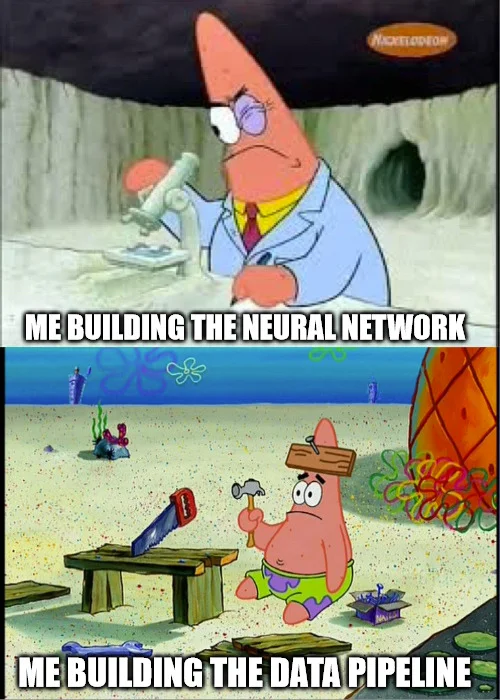


In [ ]:
#Preparing pur tools
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif

np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)


** Random Forest Classifier
Lets train our model without any feature selection or hyperparameters tuning ** 🧯

In [ ]:

# combine the preprocessor with the Classifier as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
          # ('selector', SelectKBest(mutual_info_classif, k=5)),
        ('my_classifier', 
           RandomForestClassifier(), #First lets try RandomForestClassifier
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha',
                                                   'partner rating of '
                                                   'attributes',
                                                   'sinc_o', 'intel_o', 'fun_o',
                                                   'amb_o', 'shar_o', 'like_o',
                                                   'prob_o', 'met_o', 'age', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('my_classifier', RandomForestClassifier())])

In [ ]:
# The pipeline object can be used like any sk-learn model
#Lets train our model without any feature selection or hyperparameters tuning
full_pipline = full_pipline.fit(X_train, y_train)
pred=full_pipline.predict_proba(X_test)


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = pred[:,1]

submission.to_csv('sample_submission1_rf1.csv', index=False)

**grid search and hyper parameters tuning**  🔑


Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The model is also known as an estimator. Grid search exercise can save us time, effort and resources. Grid-search is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [20, 30, 40],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[10, 20,30 ,40]       
}

# cv=6 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=6, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 6 folds for each of 12 candidates, totalling 72 fits

best score 0.855620345508822

best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
grid_search.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission2_rf2.csv', index=False)

**from the previou= cell we see that as the depth get smaller the accuracy is increasing**



 **Lets try 12-folds cross-validation**




In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [20, 30, 40],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[8,10, 20, 30]       
}

# cv=12 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=12, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 12 folds for each of 12 candidates, totalling 144 fits

best score 0.8566706158770278

best score {'my_classifier__max_depth': 8, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission3_rf3.csv', index=False)
     


 **XGboost classifier** ⏭


 **Trying without and feature selection or hyperparamters tuning**

 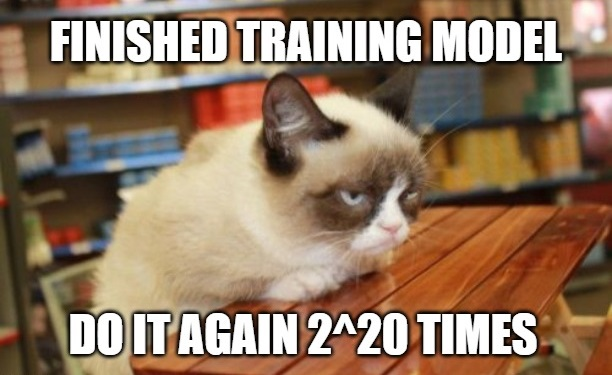




In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline1 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(),
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                     

In [ ]:
#Train the classifier
full_pipline1 = full_pipline1.fit(X_train, y_train)
pred1=full_pipline1.predict_proba(X_test)

In [ ]:
#Predicting
submission2 = pd.DataFrame()

submission2['id'] = id

submission2['match'] = pred1[:,1]

submission2.to_csv('sample_submission1_xg1.csv', index=False)

hope that xgB performs well

**next feature selction with xgb**

In [ ]:
#creating a new pipline and adding SelectKBest for a feature selection with k.... 
full_pipline2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=112)),
        ('my_classifier', 
           XGBClassifier(),
        
        )
    ]
)
full_pipline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                     

In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = pred1[:,1]

submission.to_csv('sample_submission2_XGB2.csv', index=False)
     

**we will try different hyperparamter tuning methods and change the values of k**

 **Predefined split cross-validator

Provides train/test indices to split data into train/test sets using a predefined scheme specified by the user with the test_fold parameter**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train, y_train, train_size = 0.8, stratify = y_train, random_state = 3000)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in X_train.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)


**random search**

The chances of finding the optimal parameter are comparatively higher in random search because of the random search pattern where the model might end up being trained on the optimised parameters without any aliasing. Random search works best for lower dimensional data since the time taken to find the right set is less with less number of iterations. Random search is the best parameter search technique when there are less number of dimensions. In the paper Random Search for Hyper-Parameter Optimization by Bergstra and Bengio, the authors show empirically and theoretically that random search is more efficient for parameter optimization than grid search.

In [ ]:
#RandomeizedSearchCV
rand_search = RandomizedSearchCV(
    full_pipline2, param_grid, cv=pds, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=15,
    scoring='roc_auc')

rand_search.fit(X_train, y_train)

print('best score {}'.format(rand_search.best_score_))
print('best score {}'.format(rand_search.best_params_))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.

  warnings.warn(


Fitting 1 folds for each of 12 candidates, totalling 12 fits

best score 0.8842695245134271

best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 30, 'my_classifier__max_depth': 8}


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = rand_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_XgB3.csv', index=False)

**xgb using grid search**

In [ ]:
grid_search = GridSearchCV(
    full_pipline2, param_grid, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# here we still use X_train; but the grid search model
# will use our predefined split internally to determine 
# which sample belongs to the validation set
grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 1 folds for each of 12 candidates, totalling 12 fits

best score 0.8836536092633653

best score {'my_classifier__max_depth': 8, 'my_classifier__n_estimators': 20, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission4_XGB4.csv', index=False)

**Logestic regression**

In [ ]:
# Creating a new pipline for LogisticRegression classifier
full_pipline3 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
          ('selector', SelectKBest(mutual_info_classif, k=110)),
        ('my_classifier', 
           LogisticRegression(),
        )
    ]
)
full_pipline3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                     

In [ ]:
# Set of parameters to search for the best for logistiv regression classifier 
param_grid1 = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [20, 30, 40],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__penalty':['none', 'l1', 'l2', 'elasticnet']  ,    
    'my_classifier__solver' :['newton-cg', 'lbfgs', 'liblinear'],
    'my_classifier__C' :  [1e-5, 100]

}


# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline2, param_grid1, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 1 folds for each of 72 candidates, totalling 72 fits

[02:58:54] WARNING: ../src/learner.cc:767: 

Parameters: { "C", "penalty", "solver" } are not used.



best score 0.8840950151925762

best score {'my_classifier__C': 1e-05, 'my_classifier__n_estimators': 30, 'my_classifier__penalty': 'l1', 'my_classifier__solver': 'liblinear', 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_logestic1.csv', index=False)

Trying different paramters in XGboost as  XGboost give us the best score


In [ ]:
# New set of parameters for XGboost classiifier with smallr set of max depth
param_grid_ = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [200, 300, 400],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[8,9,10,11]       
}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline2, param_grid_, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 12 candidates, totalling 120 fits

best score 0.8811011118518308

best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 200, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_XGB5.csv', index=False)

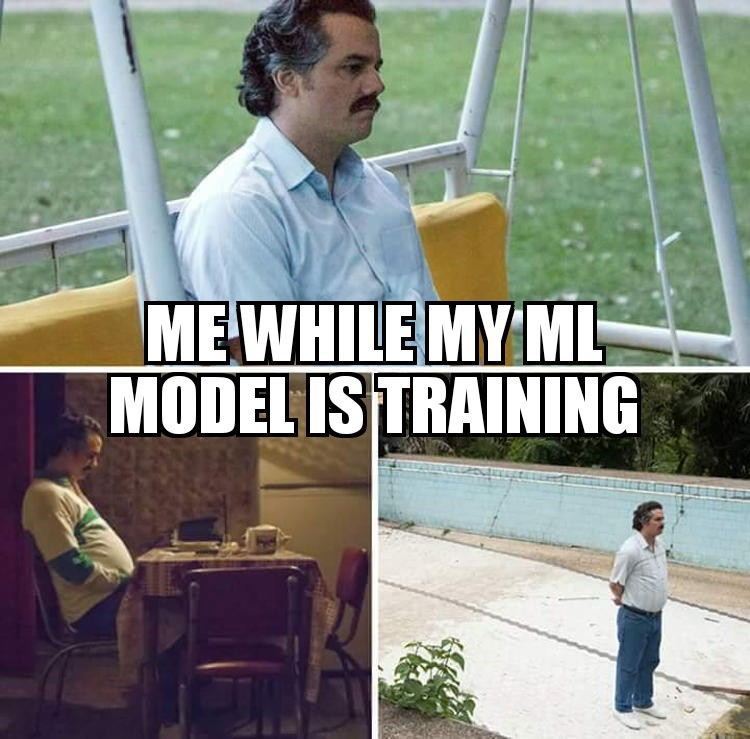

**changing learning rate in XGB pipline and create a new pipline using new learning rate**

In [ ]:
#Trying different learning rate
full_pipline_2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=100)),
        ('my_classifier', 
           XGBClassifier(learning_rate=0.02) 
        
        )
    ]
)
full_pipline_2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
# New set of parameters with more estimators and less set of max depth
param_grid_ = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [400,600,700],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[5,6,7,8,10]       
}

# cv=12 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline_2, param_grid_, cv=12, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 12 folds for each of 15 candidates, totalling 180 fits

best score 0.8853463951988102

best score {'my_classifier__max_depth': 7, 'my_classifier__n_estimators': 600, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_XGB6.csv', index=False)

In [ ]:
# New set of parameters with more estimators and less set of max depth
param_grid_ = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [600,700],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[4,5]     ,
   

}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline_2, param_grid_, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#Training the model
grid_search.fit(X_train, y_train)
#printing the best score and best parameters
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
best score 0.8836697479834676
best score {'my_classifier__max_depth': 5, 'my_classifier__n_estimators': 700, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
#Saving the submission
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_XGb7.csv', index=False)

In [ ]:
#Trying different learning rate
full_pipline_3 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=100)),
        ('my_classifier', 
           XGBClassifier(learning_rate=0.03) 
        
        )
    ]
)
full_pipline_3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
param_grid={
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [600,700],
    'my_classifier__learning_rate': (0.05, 0.10,0.06, 0.3),
   
                        'my_classifier__max_depth': [5,6,7,8],
                        # 'my_classifier__min_child_weight': [ 1, 3, 5, 7],
                        # 'my_classifier__gamma':[ 0.0, 0.1, 0.2],
                        # 'my_classifier__colsample_bytree':[ 0.3, 0.4]
          },
           
grid_search = GridSearchCV(
    full_pipline_3, param_grid, cv=9, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# here we still use X_train; but the grid search model
# will use our predefined split internally to determine 
# which sample belongs to the validation set
grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 9 folds for each of 32 candidates, totalling 288 fits
best score 0.8860250408478442
best score {'my_classifier__learning_rate': 0.05, 'my_classifier__max_depth': 7, 'my_classifier__n_estimators': 600, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_XGB8.csv', index=False)

In [ ]:
#Trying different learning rate
full_pipline_9= Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=100)),
        ('my_classifier', 
           XGBClassifier(learning_rate=0.04) 
        
        )
    ]
)
full_pipline_9

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.04,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
param_grid={
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [600,700],
    'my_classifier__learning_rate': (0.05, 0.10,0.06, 0.3),
   
                        'my_classifier__max_depth': [5,6,7,8],
                        # 'my_classifier__min_child_weight': [ 1, 3, 5, 7],
                        # 'my_classifier__gamma':[ 0.0, 0.1, 0.2],
                        # 'my_classifier__colsample_bytree':[ 0.3, 0.4]
          },
           
grid_search = GridSearchCV(
    full_pipline_9, param_grid, cv=9, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# here we still use X_train; but the grid search model
# will use our predefined split internally to determine 
# which sample belongs to the validation set
grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 9 folds for each of 32 candidates, totalling 288 fits
best score 0.8862147974889703
best score {'my_classifier__learning_rate': 0.05, 'my_classifier__max_depth': 8, 'my_classifier__n_estimators': 600, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_XGB9.csv', index=False)

In [ ]:
#Trying different learning rate
full_pipline_10= Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=100)),
        ('my_classifier', 
           XGBClassifier(learning_rate=0.06) 
        
        )
    ]
)
full_pipline_10

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.06,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
param_grid={
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [600,700],
    'my_classifier__learning_rate': (0.05, 0.10,0.06, 0.3),
   
                        'my_classifier__max_depth': [5,6,7,8],
                        # 'my_classifier__min_child_weight': [ 1, 3, 5, 7],
                        # 'my_classifier__gamma':[ 0.0, 0.1, 0.2],
                        # 'my_classifier__colsample_bytree':[ 0.3, 0.4]
          },
           
grid_search = GridSearchCV(
    full_pipline_10, param_grid, cv=9, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# here we still use X_train; but the grid search model
# will use our predefined split internally to determine 
# which sample belongs to the validation set
grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 9 folds for each of 32 candidates, totalling 288 fits
best score 0.8853617010469232
best score {'my_classifier__learning_rate': 0.1, 'my_classifier__max_depth': 8, 'my_classifier__n_estimators': 600, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = grid_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_XGB101.csv', index=False)

finally BayesSearchCV try BayesSearchCV with svm https://github.com/scikit-learn/scikit-learn/issues/12728

In [ ]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from skopt import BayesSearchCV

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC


SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced', probability=True,))
    ]
)
# SVC has a class_weight attribute for unbalanced data


# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'my_svc__degree': Integer(1,8),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
     
    
    },
    # number of trials 
    n_iter=10,
    random_state=800,
    verbose=1,
    # we still use 
    cv=pds,
)

bayes_search.fit(X_train, y_train)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.8358714043993232
best score OrderedDict([('my_svc__C', 6.724721864283324), ('my_svc__degree', 3), ('my_svc__gamma', 0.42680853637517535), ('my_svc__kernel', 'poly')])


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = bayes_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_svm.csv', index=False)

**Trying bayes search with XGboost classifier**


In [ ]:
from skopt import BayesSearchCV


In [ ]:
param_grid1 = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [20, 30, 40],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[10, 20,30 ,40]       
}

In [ ]:
from skopt import BayesSearchCV


In [ ]:
#Trying different learning rate
full_pipline_4 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=100)),
        ('my_classifier', 
           XGBClassifier(learning_rate=0.03) 
        
        )
    ]
)
full_pipline_4

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'idg', 'Condition',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age of partner',
                                                   'race of partner',
                                                   'partner stated preference',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
# Bayessearch hyperparamter method
bayes_search = BayesSearchCV(
    full_pipline_4, param_grid1, cv=pds, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

bayes_search.fit(X_train, y_train)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.8582727683337438
best score OrderedDict([('my_classifier__max_depth', 40), ('my_classifier__n_estimators', 40), ('preprocessor__num__imputer__strategy', 'mean')])


In [ ]:
submission = pd.DataFrame()

submission['id'] = id

submission['match'] = bayes_search.predict_proba(X_test)[:,1]

submission.to_csv('sample_submission_XGB_Bayes.csv', index=False)

****

**Finally i choose the model with the best score from all the trails and submit it in kaggle and the model that give me best accuracy in all trails and search was XGboos using grid search**t 💣 💃

**Based on our observation we found out that the optimal max depth is 7 and the learning_rate: 0.05, 'my_classifier__n_estimators: 600**

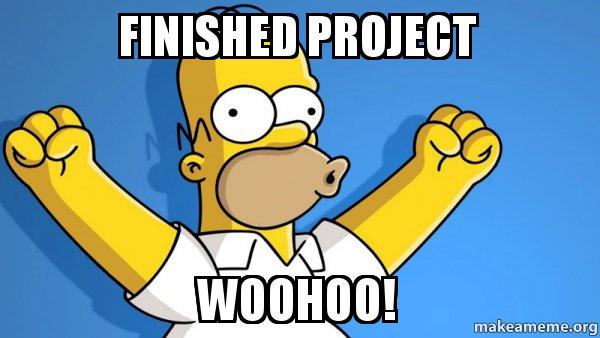

**Dicussion( Questions & Answers)**


**Why a simple linear regression model (without any activation function) is not good for classification task?**
As the linear regression model uses continuous data while classification uses discrete data, and when new data points are added, the threshold value shifts



**What's a decision tree and how it is different to a logistic regression model?**
A decision tree is a type of supervised machine learning that is used to categorise or predict outcomes based on the answers to a previous set of questions. The model is supervised learning, which means it is trained and tested on a set of data containing the intended categorization. Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two. Of course for higher-dimensional data, these lines would generalise to planes and hyperplanes. For Logistic Regression, a single linear boundary can be restricting at times



**What's the difference between grid search and random search?**


Grid Search.

The hyperparameters' domain is divided into a discrete grid. Then, using cross-validation, try every possible combination of values in this grid, calculating various performance measures. The ideal combination of values for the hyperparameters is the point on the grid that maximises the average value in cross-validation.

Random Search

It's similar to grid search, except instead of testing all of the points in the grid, it just tries a selection of them at random. A smaller subset means faster optimization but less accurate. A larger dataset means more accurate optimization, but the search comes closer to a grid search




**What's the difference between bayesian search and random search?**



Bayesian optimization methods are efficient because they select hyperparameters in an informed manner. By prioritizing hyperparameters that appear more promising from past results, Bayesian methods can find the best hyperparameters in lesser time (in fewer iterations) than both grid search and random search. Thus, instead of randomly choosing the next set of parameters, the algorithm optimizes the choice, and likely reaches the best parameter set faster than the previous two methods. Meaning, this method chooses only the relevant search space and discards the ranges that will most likely not deliver the best solution. Thus, it can be beneficial when you have a large amount of data, the learning is slow, and you want to minimize the tuning time